# Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

## Generating Data Sets

- Randomly generate $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Use ground truth: weight $\mathbf{w} = [2, -3.4]^\top$ and bias $b = 4.2$
- Generate label by $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$
  with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01. 

In [2]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

## Visualize the Second Feature and Label

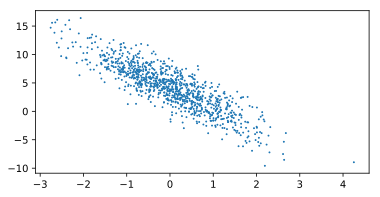

In [3]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

## Reading Data

Iterate over the data set and return `batch_size` (batch size) random examples every time.

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices

## Print a Small Data Batch

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.7335596   1.7469115 ]
 [ 1.9368594   1.6555364 ]
 [-0.6394041  -0.07654858]
 [ 1.3894764  -0.18249638]
 [ 1.1697023  -2.1075888 ]
 [ 0.5460824  -0.39909777]
 [-0.6079571   0.05669585]
 [ 2.368559   -0.7847615 ]
 [ 0.1738414   0.9742926 ]
 [-0.9740371  -0.4720347 ]]
<NDArray 10x2 @cpu(0)> 
[-5.209235   2.4382586  3.1779747  7.6058087 13.699894   6.6568666
  2.7885225 11.622317   1.2359262  3.843534 ]
<NDArray 10 @cpu(0)>


### Initialize Model Parameters

Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [6]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

### Attach Gradients to Parameters

In [7]:
w.attach_grad()
b.attach_grad()

### Define the Linear Model

In [8]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

### Define the Loss Function

In [9]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### Define the Optimization Algorithm

In [10]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

### Training

In [11]:
lr = 0.1  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000048
epoch 2, loss 0.000050
epoch 3, loss 0.000050


## Evaluate the Trained Model

In [12]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w 
[-0.00126505 -0.00020576]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00065231]
<NDArray 1 @cpu(0)>

[[ 2.001265 ]
 [-3.3997943]]
<NDArray 2x1 @cpu(0)>

[4.200652]
<NDArray 1 @cpu(0)>
